**Objective**: Compare traces of different random walk strategies

In [1]:
import os
os.chdir(os.path.join(os.getcwd(), "../code"))
import numpy as np
from parameters import Params
from simulation import Simulation
import matplotlib.pyplot as plt
from agent import LévyAgent, ExponentialAgent, BrownianAgent
from environment import Environment
from config import DATA_PATH
from pathlib import Path
from data_io import load_data
from visualization import get_color_dict, plot_traces
from config import LATEX_TEXTWIDTH

params = Params.from_json('parameters.json')
params.save = True
params.iterations = 1
params.population_size = 1
params.num_food = 0
params.resetting_boundary = False

# simulate in large environment, then crop to smaller size
params.size = 10000

padding = 30

environment = Environment(params)
folder = 'traces'
path = Path(DATA_PATH) / folder
path.mkdir(parents=True, exist_ok=True)

# Trajectory Comparison

2
0.3
300


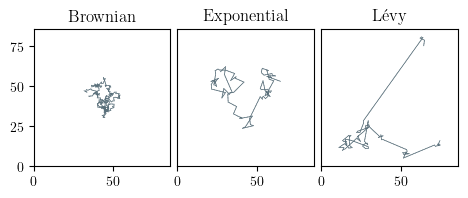

In [17]:
agents = [
    (BrownianAgent, 'brownian'),
    (ExponentialAgent, 'exponential'),
    (LévyAgent, 'levy')
]
titles = ['Brownian', 'Exponential', 'Lévy']

color_dict = get_color_dict()
padding = 5

trajectories = []

# record the trajetories
for (agent_class, agent_type) in agents:
    folder = 'traces' + f'/{agent_type}'
    params.size = 10000
    params.type = agent_type
    params.agent = agent_class
    sim = Simulation(params, params.agent)
    _ = sim.run(folder)
    data, environment, _ = load_data(folder)
    trajectories.append(data.sel(iteration=0))

# shift trajectories to fit in same environment size
x_ranges = []
y_ranges = []
for trajectory in trajectories:
    x = trajectory['x_position'].values
    y = trajectory['y_position'].values
    x_ranges.append(x.max() - x.min())
    y_ranges.append(y.max() - y.min())
    trajectory['x_position'].values = x - x.min()
    trajectory['y_position'].values = y - y.min()
environment.size = max(max(x_ranges), max(y_ranges)) + 2 * padding
params.size = environment.size
for trajectory in trajectories:
    x = trajectory['x_position'].values
    y = trajectory['y_position'].values
    trajectory['x_position'].values = x + environment.size / 2 - (x.max() - x.min()) / 2
    trajectory['y_position'].values = y + environment.size / 2 - (y.max() - y.min()) / 2

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 10,
    "font.family": "serif"
})
fig, axes = plt.subplots(1, 3, figsize=(LATEX_TEXTWIDTH, LATEX_TEXTWIDTH/2.5))

# plot the trajectories
for i, ax in enumerate(axes):
    ax.set_xlim(0, environment.size)
    ax.set_ylim(0, environment.size)
    ax.set_aspect('equal')
    if i!=0:
        ax.set_yticklabels([])
        ax.tick_params(left=False)
    ax.set_title(titles[i])
    plot_traces(ax, environment, params, trajectories[i], params.total_time, color_dict, params.simulation_steps, fade=False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.05) 
plt.savefig(path / "traces_plot.pdf", format='pdf')

print(params.mu)
print(params.alpha)
print(params.simulation_steps)

# Lévy Agent Trajectories

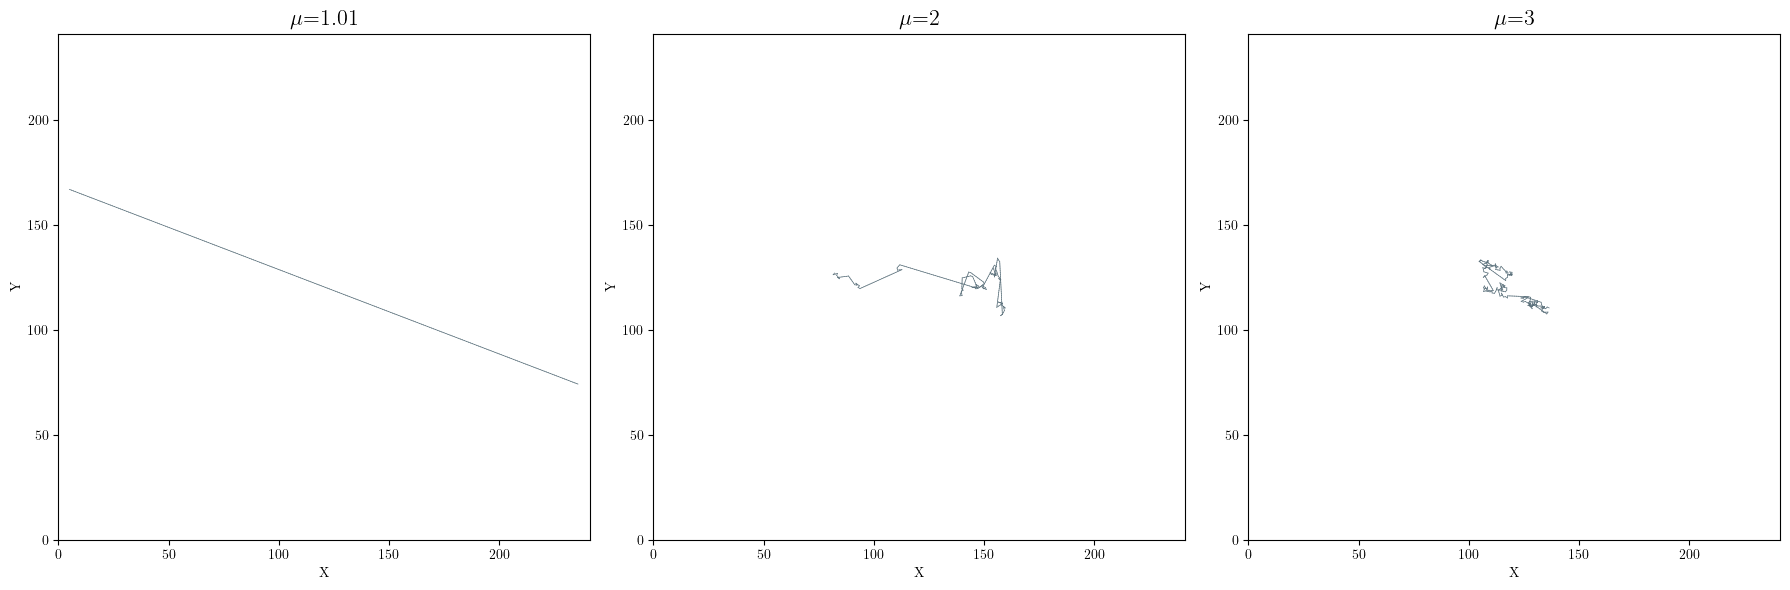

<Figure size 640x480 with 0 Axes>

In [8]:
mu_range = list(range(1, 4, 1))
mu_range[0] += 0.01
params.type = 'levy'
params.agent = LévyAgent

fig, axes = plt.subplots(1, len(mu_range), figsize=(6 * len(mu_range), 6))
color_dict = get_color_dict()
padding = 5

trajectories = []

# record the trajetories
for mu in mu_range:
    params.mu = mu
    folder = 'traces' + f'/{params.type}_mu_{mu}'
    params.size = 10000
    sim = Simulation(params, params.agent)
    _ = sim.run(folder)
    data, environment, _ = load_data(folder)
    trajectories.append(data.sel(iteration=0))

# shift trajectories to fit in same environment size
x_ranges = []
y_ranges = []
for trajectory in trajectories:
    x = trajectory['x_position'].values
    y = trajectory['y_position'].values
    x_ranges.append(x.max() - x.min())
    y_ranges.append(y.max() - y.min())
    trajectory['x_position'].values = x - x.min()
    trajectory['y_position'].values = y - y.min()
environment.size = max(max(x_ranges), max(y_ranges)) + 2 * padding
params.size = environment.size
for trajectory in trajectories:
    x = trajectory['x_position'].values
    y = trajectory['y_position'].values
    trajectory['x_position'].values = x + environment.size / 2 - (x.max() - x.min()) / 2
    trajectory['y_position'].values = y + environment.size / 2 - (y.max() - y.min()) / 2

# plot the trajectories
for i, ax in enumerate(axes):
    ax.set_xlim(0, environment.size)
    ax.set_ylim(0, environment.size)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(r'$\mu$=' + f'{mu_range[i]}', fontsize=16)
    plot_traces(ax, environment, params, trajectories[i], params.total_time, color_dict, params.simulation_steps, fade=False)

plt.tight_layout()
plt.show()
plt.savefig(path / "traces_lévy_plot.png", format='svg')

# Exponential Agent Trajectories

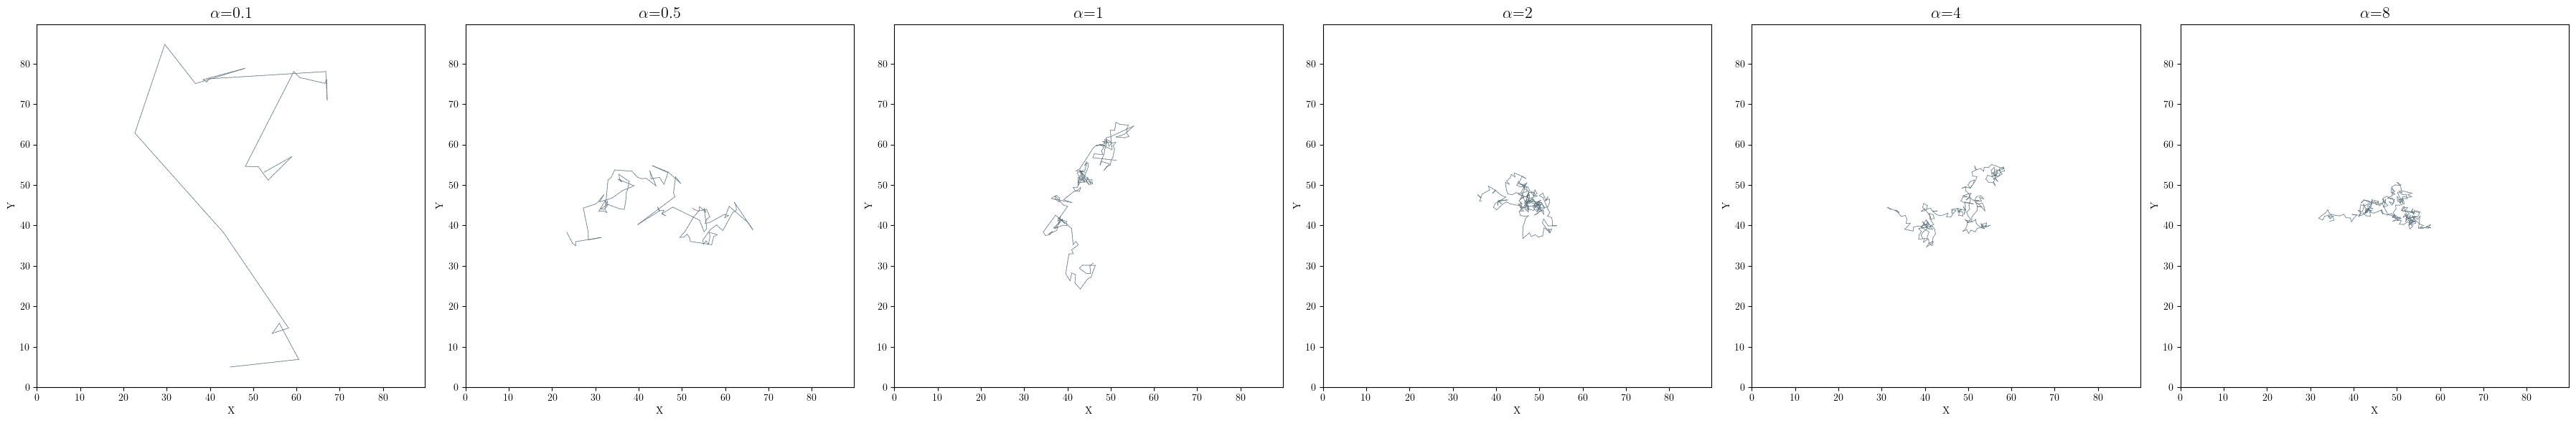

<Figure size 640x480 with 0 Axes>

In [9]:
alpha_range = [0.1, 0.5, 1, 2, 4, 8]
params.type = 'exponential'
params.agent = ExponentialAgent

fig, axes = plt.subplots(1, len(alpha_range), figsize=(6 * len(alpha_range), 6))
color_dict = get_color_dict()
padding = 5

trajectories = []

# record the trajetories
for alpha in alpha_range:
    params.alpha = alpha
    folder = 'traces' + f'/{params.type}_alpha_{alpha}'
    params.size = 10000
    sim = Simulation(params, params.agent)
    _ = sim.run(folder)
    data, environment, _ = load_data(folder)
    trajectories.append(data.sel(iteration=0))

# shift trajectories to fit in same environment size
x_ranges = []
y_ranges = []
for trajectory in trajectories:
    x = trajectory['x_position'].values
    y = trajectory['y_position'].values
    x_ranges.append(x.max() - x.min())
    y_ranges.append(y.max() - y.min())
    trajectory['x_position'].values = x - x.min()
    trajectory['y_position'].values = y - y.min()
environment.size = max(max(x_ranges), max(y_ranges)) + 2 * padding
params.size = environment.size
for trajectory in trajectories:
    x = trajectory['x_position'].values
    y = trajectory['y_position'].values
    trajectory['x_position'].values = x + environment.size / 2 - (x.max() - x.min()) / 2
    trajectory['y_position'].values = y + environment.size / 2 - (y.max() - y.min()) / 2

# plot the trajectories
for i, ax in enumerate(axes):
    ax.set_xlim(0, environment.size)
    ax.set_ylim(0, environment.size)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(r'$\alpha$=' + f'{alpha_range[i]}', fontsize=16)
    plot_traces(ax, environment, params, trajectories[i], params.total_time, color_dict, params.simulation_steps, fade=False)

plt.tight_layout()
plt.show()
plt.savefig(path / "traces_exponential_plot.png", format='svg')